In [4]:
# import tweepy
import tweepy as tw

import pandas as pd


#Get your Twitter API credentials and enter them here
consumer_key = "UiXJn7dibpSP208zmD3uEz9ro"
consumer_secret = "eojDEGg2J3l8dRRnBo6VqO91T3yhmzGOdPoM5Y8NTocb3ZNH0f"
access_key = "1230045271561818112-bTi2ADUeIG3l8UcO81jTpstwhw1LWp"
access_secret = "MIIMGvYF1tWlVctipbXpRymVC2jogqyRas12tzuYG2X0J"
# authenticate
auth = tw.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_key, access_secret)
api = tw.API(auth, wait_on_rate_limit=True)

# set up search query
search_query = "#Ukraine invasion -filter:retweets  "
date_since="2022-02-24"

# Collection of TWEETS
# get tweets from the API
tweets = tw.Cursor(api.search_tweets,
              q=search_query,
              geocode='55.751244,37.618423,800mi',  #coordinates of Moscow, with a range of 1000 miles we are in East Europe
              lang="en",
              result_type='recent',
              since=date_since).items(500)

# store the API responses in a list
tweets_copy = []
for tweet in tweets:
    tweets_copy.append(tweet)
    
print("Total Tweets fetched:", len(tweets_copy))

# Creation of the Dataframe
# intialize the dataframe
tweets_df = pd.DataFrame()

# populate the dataframe

for tweet in tweets_copy:
    hashtags = []
    try:
        for hashtag in tweet.entities["hashtags"]:
            hashtags.append(hashtag["text"])
        text = api.get_status(id=tweet.id, tweet_mode='extended').full_text
    except:
        pass
    tweets_df = tweets_df.append(pd.DataFrame({'user_name': tweet.user.name,
                                               'id':tweet.user.id,
                                               'user_location': tweet.user.location,\
                                               'user_description': tweet.user.description,
                                               'user_verified': tweet.user.verified,
                                               'date': tweet.created_at,
                                               'text': text, 
                                               'hashtags': [hashtags if hashtags else None],
                                               'source': tweet.source}))
    tweets_df = tweets_df.reset_index(drop=True)

tweets_df.head()
# creating the csv file of the dataset
#tweets_df.to_csv('Data_Frame_tweets.csv')

Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since


Total Tweets fetched: 437


,user_name,id,user_location,user_description,user_verified,date,text,hashtags,source
0,Cardinal Birds,4641281597,Украина,CARDINAL BIRDS is an Ukrainian punk rock band ...,False,2022-03-26 17:08:33+00:00,@cech_drums “Today is the 31st day of the russ...,"[war, ukraine, warinukraine]",Twitter for iPhone
1,Ukraine Update 🇺🇦,1498613297121497091,"Kyiv, Ukraine",- #Ukraine war latest update with details\n\n-...,False,2022-03-26 17:00:29+00:00,⚡In response to #Russian ongoing invasion of #...,"[Russian, Ukraine, Switzerland]",Twitter for Android
2,Ukraine Update 🇺🇦,1498613297121497091,"Kyiv, Ukraine",- #Ukraine war latest update with details\n\n-...,False,2022-03-26 16:59:08+00:00,An up-to-date map of the #Russian invasion of ...,"[Russian, Ukraine, British]",Twitter for Android
3,Ming the Merciless,1128354210674806784,Donbas,#IComeInPeace #NotReally Call +7495606...,False,2022-03-26 16:09:25+00:00,@mfa_russia @StateDept @RussiaUN @RusEmbUSA @U...,None,Twitter for iPhone
4,Jayden X 🇺🇦,1479077497929043968,"Kyiv, Ukraine",Video Journalist | Documentarian | Frontlines ...,False,2022-03-26 13:16:49+00:00,Czechs remind the people working for the Russi...,None,IFTTT


In [134]:
# convert DateTime to Date
tweets_df['date'] = pd.to_datetime(tweets_df['date']).dt.date

In [135]:
tweets_df['date'].unique

<bound method Series.unique of 0      2022-03-23
1      2022-03-23
2      2022-03-23
3      2022-03-23
4      2022-03-23
          ...    
404    2022-03-15
405    2022-03-15
406    2022-03-15
407    2022-03-15
408    2022-03-15
Name: date, Length: 409, dtype: object>

In [136]:
# Importing Lybraries to analyze the polarity of the tweet
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sid = SentimentIntensityAnalyzer()

import re
import pandas as pd
import nltk
nltk.download('words')
words = set(nltk.corpus.words.words())

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/davidebittelli/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     /Users/davidebittelli/nltk_data...
[nltk_data]   Package words is already up-to-date!


In [137]:
print(tweets_df['text'][0:150])

0      Open letter of #Ukraine's major media organiza...
1      "#Belarus allowed its territory to be used as ...
2      #Allies adopted economic sanctions due to #rus...
3      NATO considers #Belarus a co-conspirator in th...
4      Open letter by #Ukraine’s media organizations ...
                             ...                        
145    #Ukraine China's silk road project is a new Mo...
146    Good evening, we are from Ukraine! 😏💪\n#Ukrain...
147    Russia's invasion of Ukraine is reaching a dea...
148    Sadly, the skin color of war victims seems to ...
149    Evening Live on @BILD about current situation ...
Name: text, Length: 150, dtype: object


In [138]:
# Analizing the polarity 
sentence = tweets_df['text'][48]
sid.polarity_scores(sentence)['compound']

-0.5023

In [139]:
def cleaner(text):
    text = re.sub("@[A-Za-z0-9]+","",text) #Remove @ sign
    text = re.sub(r"(?:\@|http?\://|https?\://|www)\S+", "", text) #Remove http links
    text = " ".join(text.split())
    text = text.replace("#", "").replace("_", " ") #Remove hashtag sign but keep the text
    text = text.replace("often", "").replace("sometimes","").replace("said","").replace("think","")
    text = " ".join(w for w in nltk.wordpunct_tokenize(text)
         if w.lower() in words or not w.isalpha())
    return text
    
tweets_df['text_clean'] = tweets_df['text'].apply(cleaner)
# we added the column text_clean
tweets_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 409 entries, 0 to 408
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   user_name         409 non-null    object
 1   id                409 non-null    int64 
 2   user_location     409 non-null    object
 3   user_description  409 non-null    object
 4   user_verified     409 non-null    bool  
 5   date              409 non-null    object
 6   text              409 non-null    object
 7   hashtags          285 non-null    object
 8   source            409 non-null    object
 9   text_clean        409 non-null    object
dtypes: bool(1), int64(1), object(8)
memory usage: 29.3+ KB


In [140]:
print(tweets_df['text_clean'][0:150])

0      Open letter of ' s major media to around the w...
1      " its territory to be used as a training groun...
2      Allies adopted economic due to russia ' invasi...
3                     a - conspirator in the invasion of
4         Open letter by ’ s media to around the world :
                             ...                        
145    China ' s silk road project is a new invasion ...
146    Good evening , we are from ! 😏💪 been opposing ...
147    Russia ' s invasion of is reaching a deadly st...
148    Sadly , the skin color of war to be the bigges...
149    Evening Live on about current situation in and...
Name: text_clean, Length: 150, dtype: object


In [141]:
# Let's perform the Sentiment Analysis
# We create our own dictionary with words and their own polarity(-1 for negatives and 1 for positives)
word_dict = {'blood':-1,'war':-1,'Russian invasion':-1,'teamPutin':-1,
            'bombs':-1,'call to arms':-1,'support Russia':-1,'support Putin':-1,'Nuclear abolished':1,'Nuclear alert':-1,'NATO supports Ukraine':1,
            'support Ukraine':1,'support Kyev':1,'support Volodymyr Zelensky':1,'support Zelensky':1,'team Zelensky':1,'Zelensky resists':1,'Ukraine resists':1 }

import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sid = SentimentIntensityAnalyzer()
sid.lexicon.update(word_dict)

list1 = []
for i in tweets_df['text_clean']:
    list1.append((sid.polarity_scores(str(i)))['compound'])


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/davidebittelli/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [142]:
# Coverting the compound scores into categories:"negative", "neutral" or "positive"

# We add the new column 'sentiment' and we fill it with the previous list
tweets_df['sentiment'] = pd.Series(list1)

def sentiment_category(sentiment):
    label = ''
    if(sentiment>0):
        label = 'positive'
    elif(sentiment == 0):
        label = 'neutral'
    else:
        label = 'negative'
    return(label)

tweets_df['sentiment_category'] = tweets_df['sentiment'].apply(sentiment_category)

#We add "sentiment_category" column
tweets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 409 entries, 0 to 408
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   user_name           409 non-null    object 
 1   id                  409 non-null    int64  
 2   user_location       409 non-null    object 
 3   user_description    409 non-null    object 
 4   user_verified       409 non-null    bool   
 5   date                409 non-null    object 
 6   text                409 non-null    object 
 7   hashtags            285 non-null    object 
 8   source              409 non-null    object 
 9   text_clean          409 non-null    object 
 10  sentiment           409 non-null    float64
 11  sentiment_category  409 non-null    object 
dtypes: bool(1), float64(1), int64(1), object(9)
memory usage: 35.7+ KB


In [143]:
# Check if everything is ok
check = tweets_df[['text_clean','date','id','sentiment','sentiment_category']]
check.head()

,text_clean,date,id,sentiment,sentiment_category
0,Open letter of ' s major media to around the w...,2022-03-23,524122127,0.0000,neutral
1,""" its territory to be used as a training groun...",2022-03-23,1278653174371487747,-0.4767,negative
2,Allies adopted economic due to russia ' invasi...,2022-03-23,397846530,-0.8248,negative
3,a - conspirator in the invasion of,2022-03-23,1278653174371487747,0.0000,neutral
4,Open letter by ’ s media to around the world :,2022-03-23,524122127,0.0000,neutral


In [144]:
# counting how many positive and negative tweets
tweets_df.sentiment_category.value_counts()

negative    214
positive    117
neutral      78
Name: sentiment_category, dtype: int64

In [145]:
#We are not going to consider neutral tweets
# Counting negatives and positive tweets and group them by date
neg = tweets_df[tweets_df['sentiment_category']=='negative']
neg = neg.groupby(['date'],as_index=False).count()

pos = tweets_df[tweets_df['sentiment_category']=='positive']
pos = pos.groupby(['date'],as_index=False).count()

pos = pos[['date','id']]
neg = neg[['date','id']]


In [146]:
# Visualizing the sentiment
#pip install plotly
import plotly.graph_objs as go

fig = go.Figure()
for col in pos.columns:
    fig.add_trace(go.Scatter(x=pos['date'], y=pos['id'],
                             name = col,
                             mode = 'markers+lines',
                             line=dict(shape='linear'),
                             connectgaps=True,
                             line_color='green'
                             )
                 )

for col in neg.columns:
    fig.add_trace(go.Scatter(x=neg['date'], y=neg['id'],
                             name = col,
                             mode = 'markers+lines',
                             line=dict(shape='linear'),
                             connectgaps=True,
                             line_color='red'
                             )
                 )
fig.show()


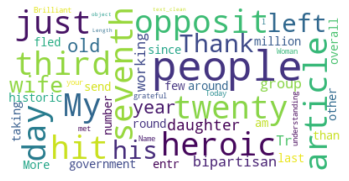

In [148]:
# Create a word cloud about Positive tweets
import matplotlib.pyplot as plt
from wordcloud import WordCloud
#tweets_df2 = tweets_df[(tweets_df['date']>='2019-05-11') & (df['date']<='2019-05-14')]
tweets_df2 = tweets_df
positive = tweets_df2[tweets_df2['sentiment_category']=='positive']
wordcloud_pos = WordCloud(max_font_size=50, max_words=500, background_color="white",
                         stopwords=['study','to','of','on',"for",'an','the','in','and','he',
                                    'a','I','you','he','she','it','we',"from",'that','is','are',
                                    "as",'not','some','have','invasion',
                                    'every','they','with','dtype']).generate(str(positive['text_clean']))
plt.figure()
plt.imshow(wordcloud_pos, interpolation="bilinear")
plt.axis("off")
plt.show()

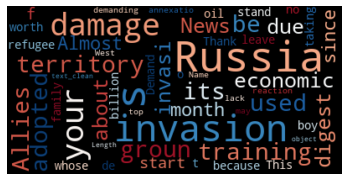

In [149]:
# Create a word cloud about Negative tweets
import matplotlib.pyplot as plt
from wordcloud import WordCloud
#tweets_df2 = tweets_df[(tweets_df['date']>='2019-05-11') & (df['date']<='2019-05-14')]
tweets_df2 = tweets_df
positive = tweets_df2[tweets_df2['sentiment_category']=='negative']
wordcloud_neg = WordCloud(max_font_size=50, max_words=500, background_color="black",colormap='RdBu',
                         stopwords=['study','to','of','on',"for",'an','the','in','and','he',
                                    'a','I','you','he','she','it','we','from','that','is','are',"as",'not','some','have',
                                    'every','they','with','dtype']).generate(str(positive['text_clean']))
plt.figure()
plt.imshow(wordcloud_neg, interpolation="bilinear")
plt.axis("off")
plt.show()

In [150]:
tweets_df.head()

,user_name,id,user_location,user_description,user_verified,date,text,hashtags,source,text_clean,sentiment,sentiment_category
0,Andreas Umland,524122127,Kyiv,Analyst @SCEEUS_UI @UISweden. Assoc. Prof. @Na...,False,2022-03-23,Open letter of #Ukraine's major media organiza...,"[Ukraine, journalists]",Twitter for Android,Open letter of ' s major media to around the w...,0.0000,neutral
1,Voices from Belarus,1278653174371487747,Minsk,Insides and verified information from reliable...,False,2022-03-23,"""#Belarus allowed its territory to be used as ...",[Belarus],Twitter for iPhone,""" its territory to be used as a training groun...",-0.4767,negative
2,Oleksii Selin,397846530,"Kyiv, Ukraine",Ukrainian diplomat,False,2022-03-23,#Allies adopted economic sanctions due to #rus...,"[Allies, russia, Ukraine]",Twitter for Android,Allies adopted economic due to russia ' invasi...,-0.8248,negative
3,Voices from Belarus,1278653174371487747,Minsk,Insides and verified information from reliable...,False,2022-03-23,NATO considers #Belarus a co-conspirator in th...,"[Belarus, Ukraine]",Twitter for iPhone,a - conspirator in the invasion of,0.0000,neutral
4,Andreas Umland,524122127,Kyiv,Analyst @SCEEUS_UI @UISweden. Assoc. Prof. @Na...,False,2022-03-23,Open letter by #Ukraine’s media organizations ...,[Ukraine],LinkedIn,Open letter by ’ s media to around the world :,0.0000,neutral


In [152]:
# export in csv
tweets_df.to_csv('Data_Frame_tweets.csv')